# Problem Set 2

### Name : Charitha Madhamsetty

### Problem 1: Genetic Algorithm Implementation

#### 1. Representation and Initialization

In [518]:
import numpy as np

In [519]:
def get_initial_population_config(config):
    np.random.seed(1470)  
    with open(config, 'r') as file:
        lines = file.readlines()
        pop_size = int(lines[0])
        n = int(lines[1])
        stop = int(lines[2])
        W = int(lines[3])
        S = [tuple(map(int, line.split())) for line in lines[4:]]
    g = 0  
    P = np.random.randint(2, size=(pop_size, n))  
    return P, W, S, g, stop, n

#### 2. Fitness Function

In [520]:
def fitness_function(chromosome, S, W):
    tvalue = 0
    tweight = 0
    for i,gene in enumerate(chromosome):
        if gene == 1:
            tvalue += S[i][1]
            tweight += S[i][0]
    if tweight > W:
        return 0
    return tvalue

In [521]:
def value_function(chromosome, S, W):
    tvalue = 0
    for i, gene in enumerate(chromosome):
        if gene == 1:
            tvalue += S[i][1]
    return tvalue

#### Custom Fitness function with penalty 

In [522]:
def fitness_function_penalty(chromosome, S, W):
    tvalue = 0
    tweight = 0
    for i, gene in enumerate(chromosome):
        if gene == 1:
            tweight += S[i][0]  
            tvalue += S[i][1]   
    if tweight > W:
        penalty = (tweight - W) / W
        return tvalue - penalty * tvalue
    return tvalue

#### Repair Function - to avoid individuals with weights greater than knapsack weights in the next generation - applied after mutation

In [523]:
def repair_function(chromosome, S, W):
    tweight = sum(c * w for c, (w, v) in zip(chromosome, S))
    if tweight > W:
        indices = np.argsort([-S[i][0] for i in range(len(S))])  
        for idx in indices:
            if tweight <= W:
                break
            if chromosome[idx] == 1:  
                chromosome[idx] = 0  
                tweight -= S[idx][0]  
    return chromosome

#### Weight Function

In [524]:
def weight_function(chromosome, S):
    tweight = 0
    for i, gene in enumerate(chromosome):
        if gene == 1:
            tweight += S[i][0]
    return tweight

#### 3. Selection

##### Tournament Selection

In [525]:
def tournament(P, fitness_values, k = 2):
    selected = np.random.choice(len(P), k)
    best = selected[0]
    for i in range(1, len(selected)):
        if fitness_values[selected[i]] > fitness_values[best]:
            best = selected[i]
    return P[best]

##### Roulette Wheel selection

In [526]:
def roulette_wheel(P, fitness_values):
    tfitness = np.sum(fitness_values)
    if tfitness == 0:
        return P[np.random.randint(len(P))]
    probabilities = [i/tfitness for i in fitness_values]
    selected = np.random.choice(len(P), p = probabilities)
    return P[selected]

#### 4. Crossover - Single Point Crossover

In [527]:
def crossover(p1, p2):
    crossover_point = np.random.randint(1, len(p1) - 1)
    c1 = np.concatenate((p1[:crossover_point], p2[crossover_point:]))
    c2 = np.concatenate((p1[crossover_point:], p2[:crossover_point]))
    return c1, c2

#### 5. Mutation

In [528]:
def mutate(chromosome, Mr):
    for i in range(len(chromosome)):
        if np.random.uniform(0,1) < Mr:
            chromosome[i] = 1 - chromosome[i]
    return chromosome

#### 6. Stop Criterion

As a stopping criteria, I have used Pstop initially i.e., the genetic algorithm stops after reaching specified number of generations.
As a custom stopping criteria, I have implemented convergence method where the algorithm stops after reaching the specified number of generations which have shown no increase in the fitness value.

#### Q2. Selection Alone

In [529]:
def selection_alone(config, selection, fitness):
    P, W, S, g, stop, n = get_initial_population_config(config)
    pop_size = len(P)
    avg_fit_gen = []
    best_fit_gen = []
    best_gene_gen = []
    for g in range(stop):
        if fitness == "without penalty":
            fit_val = [fitness_function(chromosome, S, W) for chromosome in P]
        elif fitness == "with penalty":
            fit_val = [fitness_function_penalty(chromosome, S, W) for chromosome in P]
        avg_fit = np.mean(fit_val)
        avg_fit_gen.append(avg_fit)
        best_fit = max(fit_val)
        best_chr = P[np.argmax(fit_val)]
        best_fit_gen.append(best_fit)
        n_active_gene = np.sum(best_chr)
        best_gene_gen.append(n_active_gene)
        new_P = []
        for _ in range(pop_size):
            if selection == 'roulette':
                new_P.append(roulette_wheel(P, fit_val))
            elif selection == 'tournament':
                new_P.append(tournament(P, fit_val))
        P = np.array(new_P)
    if fitness == "without penalty":
        fit_val_final = [fitness_function(chromosome, S, W) for chromosome in P]
    elif fitness == "with penalty":
        fit_val_final = [fitness_function_penalty(chromosome, S, W) for chromosome in P]
    avg_fit_final = np.mean(fit_val_final)
    avg_fit_gen.append(avg_fit_final)
    best_fit_final = max(fit_val_final)
    best_fit_gen.append(best_fit_final)
    best_chr_final = P[np.argmax(fit_val_final)]
    active_gene_final = np.sum(best_chr_final)
    best_gene_gen.append(active_gene_final)
    max_weight = weight_function(best_chr_final, S)
    print("Best Individual at Pstop: ", best_chr_final)
    print(f"Total Value at Pstop: {best_fit_final:.2f}")
    print(f"Maximum weight included in knapsack at Pstop: {max_weight:.2f}")
    print(f"Number of items included in knapsack at Pstop: {active_gene_final}")
    return avg_fit_gen, best_fit_gen, best_gene_gen      

For each configuration, report performance with only the selection
operator active (i.e. without cross-over and mutation). Do this for each selection method (Roulette
Wheel Selection vs. Tournament Selection). Plot the fitness of the population at each generation
in a fitness function graph both from the perspective of (a) average population fitness in Pstop, and
(b) the fitness score and the number of active genes of the fittest individual in Pstop. In addition,
provide (c) the number of active genes and fitness for the best solution overall throughout the
experiment and say in what generation it occurred. 

In [530]:
config_1 = 'config_1.txt'
config_2 = 'config_2.txt'

##### Results Using Config1

###### Values at Pstop For both Roulette and tournament

In [531]:
print("Roulette Wheel Selection method: ")
avg_fit_gen_rou, best_fit_gen_rou, best_gene_gen_rou = selection_alone(config_1, "roulette", "without penalty")
print("Tournament Selection method: ")
avg_fit_gen_tou, best_fit_gen_tou, best_gene_gen_tou = selection_alone(config_1, "tournament", "without penalty")

Roulette Wheel Selection method: 
Best Individual at Pstop:  [0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0
 0 0 1 0 0 1 1 0 0 0 1 1 1]
Total Value at Pstop: 5382.00
Maximum weight included in knapsack at Pstop: 847.00
Number of items included in knapsack at Pstop: 24
Tournament Selection method: 
Best Individual at Pstop:  [0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0
 0 0 1 0 0 1 1 0 0 0 1 1 1]
Total Value at Pstop: 5382.00
Maximum weight included in knapsack at Pstop: 847.00
Number of items included in knapsack at Pstop: 24


###### a anb b - Plots

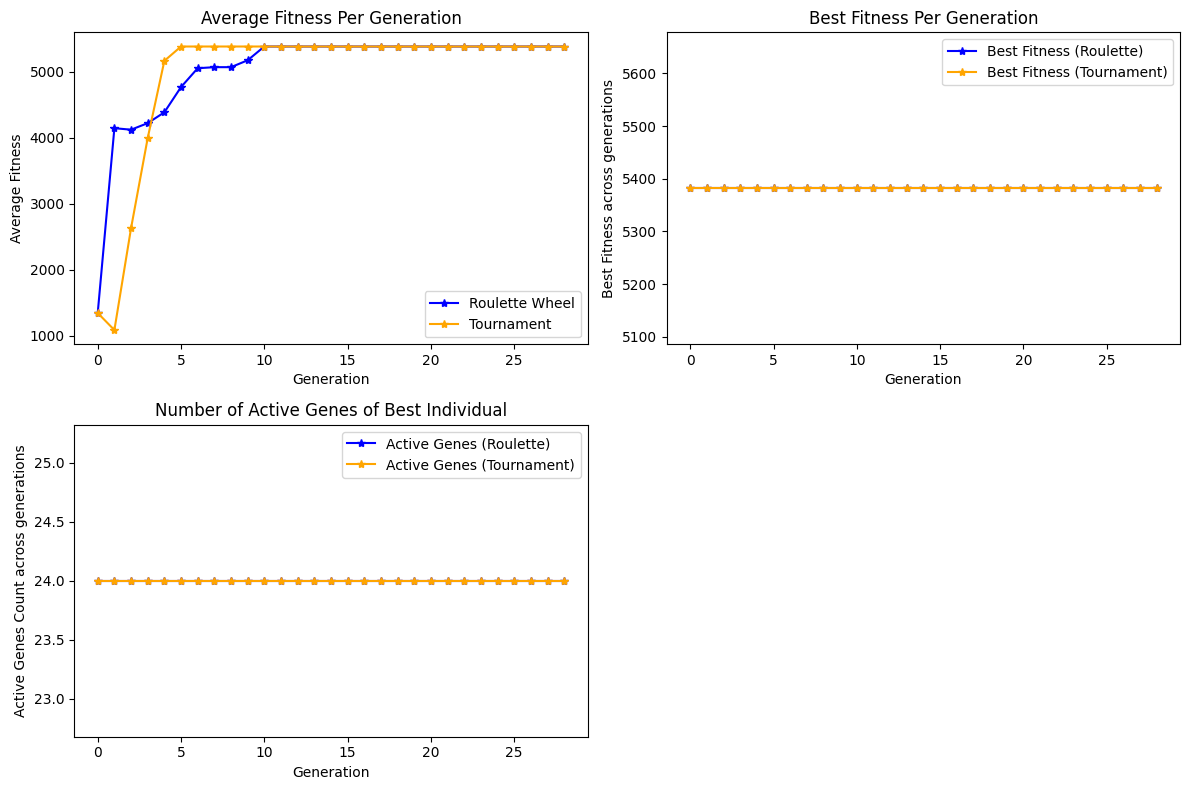

In [532]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
plt.plot(avg_fit_gen_rou, label="Roulette Wheel", color='blue', marker = '*')
plt.plot(avg_fit_gen_tou, label="Tournament", color='orange', marker = '*')
plt.title('Average Fitness Per Generation')
plt.xlabel('Generation')
plt.ylabel('Average Fitness')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(best_fit_gen_rou, label=f'Best Fitness (Roulette)', color='blue', marker = '*')
plt.plot(best_fit_gen_tou, label=f'Best Fitness (Tournament)', color='orange', marker = '*')
plt.title('Best Fitness Per Generation')
plt.xlabel('Generation')
plt.ylabel('Best Fitness across generations')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(best_gene_gen_rou, label='Active Genes (Roulette)', color='blue', marker = '*')
plt.plot(best_gene_gen_tou, label='Active Genes (Tournament)', color='orange', marker = '*')
plt.title('Number of Active Genes of Best Individual')
plt.xlabel('Generation')
plt.ylabel('Active Genes Count across generations')
plt.legend()

plt.tight_layout()
plt.show()

##### c. Values of Best individual across generations using roulette and tournament

In [533]:
print("Using Roulette Selection method for config 1: ")
best_fit = max(best_fit_gen_rou)
best_gen = best_fit_gen_rou.index(best_fit)
best_active_genes = best_gene_gen_rou[best_gen]
print("The number of active genes in the best solution across all generations: ", best_active_genes)
print(f"The fitness of the best solution across all generations: {best_fit:.2f}")
print("The first generation which has produced best solution: ", best_gen)

Using Roulette Selection method for config 1: 
The number of active genes in the best solution across all generations:  24
The fitness of the best solution across all generations: 5382.00
The first generation which has produced best solution:  0


In [534]:
print("Using Tournament Selection method for config 1: ")
best_fit = max(best_fit_gen_tou)
best_gen = best_fit_gen_tou.index(best_fit)
best_active_genes = best_gene_gen_tou[best_gen]
print("The number of active genes in the best solution across all generations: ", best_active_genes)
print(f"The fitness of the best solution across all generations: {best_fit:.2f}")
print("The first generation which has produced best solution: ", best_gen)

Using Tournament Selection method for config 1: 
The number of active genes in the best solution across all generations:  24
The fitness of the best solution across all generations: 5382.00
The first generation which has produced best solution:  0


##### Results using config2

###### Values at Pstop For both Roulette and tournament

In [535]:
print("Roulette Wheel Selection method: ")
avg_fit_gen_rou, best_fit_gen_rou, best_gene_gen_rou = selection_alone(config_2, "roulette", "without penalty")
print("Tournament Selection method: ")
avg_fit_gen_tou, best_fit_gen_tou, best_gene_gen_tou = selection_alone(config_2, "tournament", "without penalty")

Roulette Wheel Selection method: 
Best Individual at Pstop:  [1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0
 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1
 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0]
Total Value at Pstop: 0.00
Maximum weight included in knapsack at Pstop: 24042.00
Number of items included in knapsack at Pstop: 51
Tournament Selection method: 
Best Individual at Pstop:  [1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0
 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1]
Total Value at Pstop: 0.00
Maximum weight included in knapsack at Pstop: 24783.00
Number of items included in knapsack at Pstop: 53


###### a and b - Plots

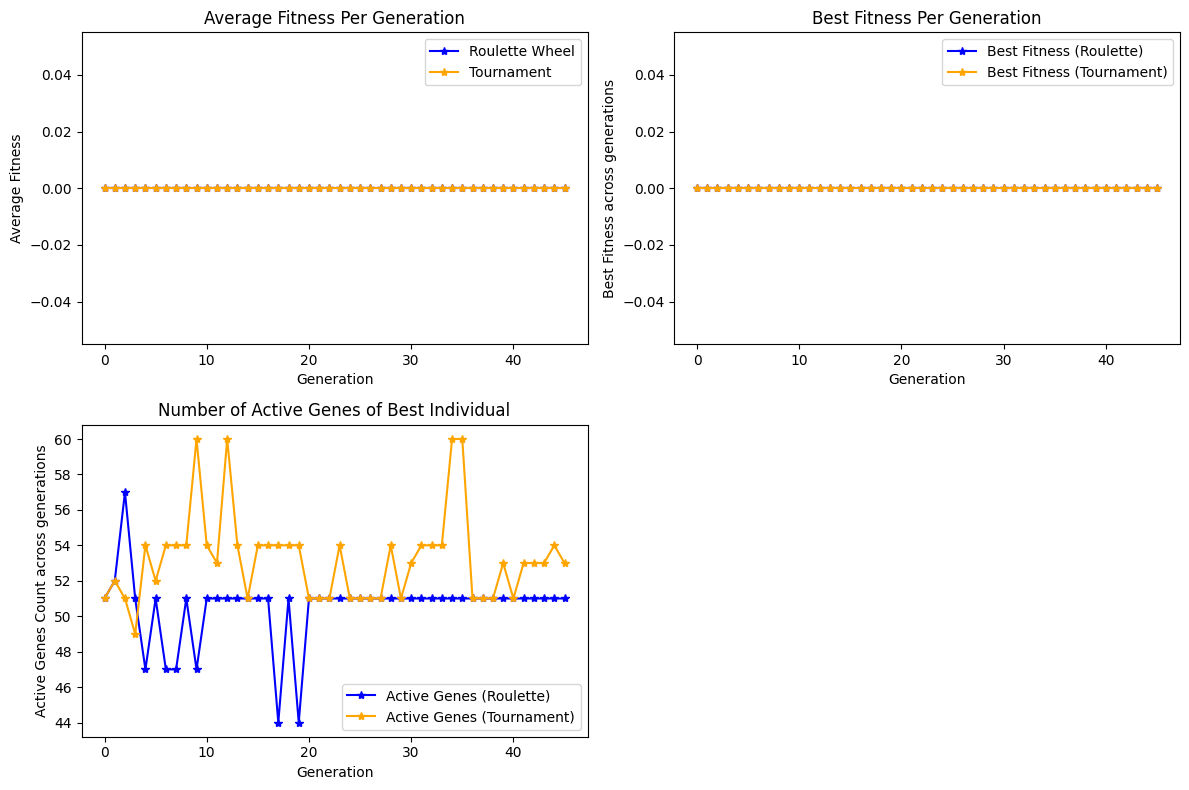

In [536]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
plt.plot(avg_fit_gen_rou, label="Roulette Wheel", color='blue', marker = '*')
plt.plot(avg_fit_gen_tou, label="Tournament", color='orange', marker = '*')
plt.title('Average Fitness Per Generation')
plt.xlabel('Generation')
plt.ylabel('Average Fitness')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(best_fit_gen_rou, label=f'Best Fitness (Roulette)', color='blue', marker = '*')
plt.plot(best_fit_gen_tou, label=f'Best Fitness (Tournament)', color='orange', marker = '*')
plt.title('Best Fitness Per Generation')
plt.xlabel('Generation')
plt.ylabel('Best Fitness across generations')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(best_gene_gen_rou, label='Active Genes (Roulette)', color='blue', marker = '*')
plt.plot(best_gene_gen_tou, label='Active Genes (Tournament)', color='orange', marker = '*')
plt.title('Number of Active Genes of Best Individual')
plt.xlabel('Generation')
plt.ylabel('Active Genes Count across generations')
plt.legend()

plt.tight_layout()
plt.show()

###### c. Values of Best individual across generations using roulette and tournament

In [537]:
print("Using Roulette Selection method for config 2:")
best_fit = max(best_fit_gen_rou)
best_gen = best_fit_gen_rou.index(best_fit)
best_active_genes = best_gene_gen_rou[best_gen]
print("The number of active genes in the best solution across all generations: ", best_active_genes)
print(f"The fitness of the best solution across all generations: {best_fit:.2f}")
print("The first generation which has produced best solution: ", best_gen)

Using Roulette Selection method for config 2:
The number of active genes in the best solution across all generations:  51
The fitness of the best solution across all generations: 0.00
The first generation which has produced best solution:  0


In [538]:
print("Using Tournament Selection method for config 2:")
best_fit = max(best_fit_gen_tou)
best_gen = best_fit_gen_tou.index(best_fit)
best_active_genes = best_gene_gen_tou[best_gen]
print("The number of active genes in the best solution across all generations: ", best_active_genes)
print(f"The fitness of the best solution across all generations: {best_fit:.2f}")
print("The first generation which has produced best solution: ", best_gen)

Using Tournament Selection method for config 2:
The number of active genes in the best solution across all generations:  51
The fitness of the best solution across all generations: 0.00
The first generation which has produced best solution:  0


##### Q2 Extra Credit - fitness with penalty

##### Results using config1

###### Values at Pstop For both Roulette and tournament - with penalty

In [539]:
print("Roulette Wheel Selection method with penalty: ")
avg_fit_gen_rou_pen, best_fit_gen_rou_pen, best_gene_gen_rou_pen = selection_alone(config_1, "roulette", "with penalty")
print("Tournament Selection method with penalty: ")
avg_fit_gen_tou_pen, best_fit_gen_tou_pen, best_gene_gen_tou_pen = selection_alone(config_1, "tournament", "with penalty")

Roulette Wheel Selection method with penalty: 
Best Individual at Pstop:  [0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0
 1 1 0 1 1 0 0 0 0 1 0 0 0]
Total Value at Pstop: 5048.35
Maximum weight included in knapsack at Pstop: 870.00
Number of items included in knapsack at Pstop: 25
Tournament Selection method with penalty: 
Best Individual at Pstop:  [0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0
 0 0 1 0 0 1 1 0 0 0 1 1 1]
Total Value at Pstop: 5382.00
Maximum weight included in knapsack at Pstop: 847.00
Number of items included in knapsack at Pstop: 24


###### Plots

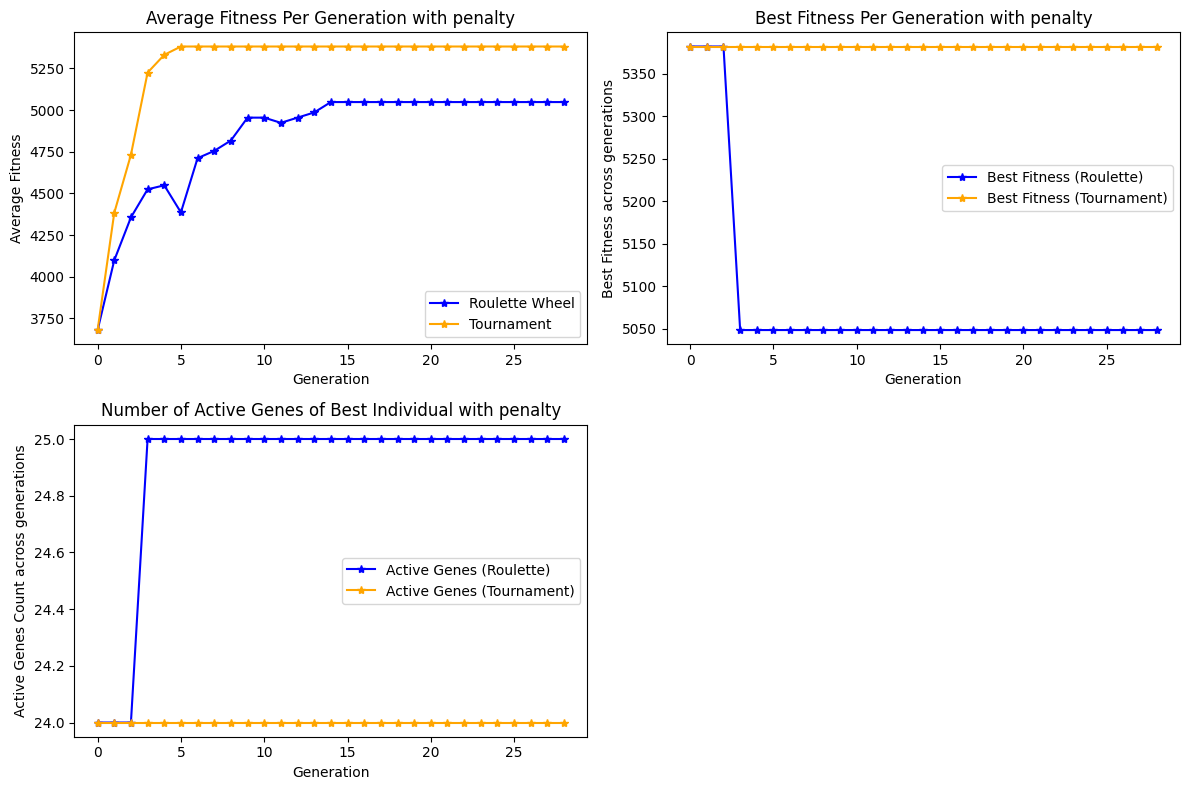

In [540]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
plt.plot(avg_fit_gen_rou_pen, label="Roulette Wheel", color='blue', marker = '*')
plt.plot(avg_fit_gen_tou_pen, label="Tournament", color='orange', marker = '*')
plt.title('Average Fitness Per Generation with penalty')
plt.xlabel('Generation')
plt.ylabel('Average Fitness')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(best_fit_gen_rou_pen, label=f'Best Fitness (Roulette)', color='blue', marker = '*')
plt.plot(best_fit_gen_tou_pen, label=f'Best Fitness (Tournament)', color='orange', marker = '*')
plt.title('Best Fitness Per Generation with penalty')
plt.xlabel('Generation')
plt.ylabel('Best Fitness across generations')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(best_gene_gen_rou_pen, label='Active Genes (Roulette)', color='blue', marker = '*')
plt.plot(best_gene_gen_tou_pen, label='Active Genes (Tournament)', color='orange', marker = '*')
plt.title('Number of Active Genes of Best Individual with penalty')
plt.xlabel('Generation')
plt.ylabel('Active Genes Count across generations')
plt.legend()

plt.tight_layout()
plt.show()

###### Values of Best individual across generations using roulette and tournament - with penalty

In [541]:
print("Using Roulette Selection method for config 1 with penalty:")
best_fit_pen = max(best_fit_gen_rou_pen)
best_gen_pen = best_fit_gen_rou_pen.index(best_fit_pen)
best_active_genes_pen = best_gene_gen_rou_pen[best_gen_pen]
print("The number of active genes in the best solution across all generations: ", best_active_genes_pen)
print(f"The fitness of the best solution across all generations: {best_fit_pen:.2f}")
print("The first generation which has produced best solution: ", best_gen_pen)

print("Using Tournament Selection method for config 1 with penalty:")
best_fit_pen = max(best_fit_gen_tou_pen)
best_gen_pen = best_fit_gen_tou_pen.index(best_fit_pen)
best_active_genes_pen = best_gene_gen_tou_pen[best_gen_pen]
print("The number of active genes in the best solution across all generations: ", best_active_genes_pen)
print(f"The fitness of the best solution across all generations: {best_fit_pen:.2f}")
print("The first generation which has produced best solution: ", best_gen_pen)

Using Roulette Selection method for config 1 with penalty:
The number of active genes in the best solution across all generations:  24
The fitness of the best solution across all generations: 5382.00
The first generation which has produced best solution:  0
Using Tournament Selection method for config 1 with penalty:
The number of active genes in the best solution across all generations:  24
The fitness of the best solution across all generations: 5382.00
The first generation which has produced best solution:  0


##### Results using Config2

###### Values at Pstop For both Roulette and tournament - with penalty

In [542]:
print("Roulette Wheel Selection method with penalty: ")
avg_fit_gen_rou_pen, best_fit_gen_rou_pen, best_gene_gen_rou_pen = selection_alone(config_2, "roulette", "with penalty")
print("Tournament Selection method without penalty: ")
avg_fit_gen_tou_pen, best_fit_gen_tou_pen, best_gene_gen_tou_pen = selection_alone(config_2, "tournament", "with penalty")

Roulette Wheel Selection method with penalty: 
Best Individual at Pstop:  [1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1
 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1
 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1]
Total Value at Pstop: -34494.31
Maximum weight included in knapsack at Pstop: 31635.00
Number of items included in knapsack at Pstop: 60
Tournament Selection method without penalty: 
Best Individual at Pstop:  [0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0
 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1]
Total Value at Pstop: -7004.92
Maximum weight included in knapsack at Pstop: 15107.00
Number of items included in knapsack at Pstop: 35


###### plots

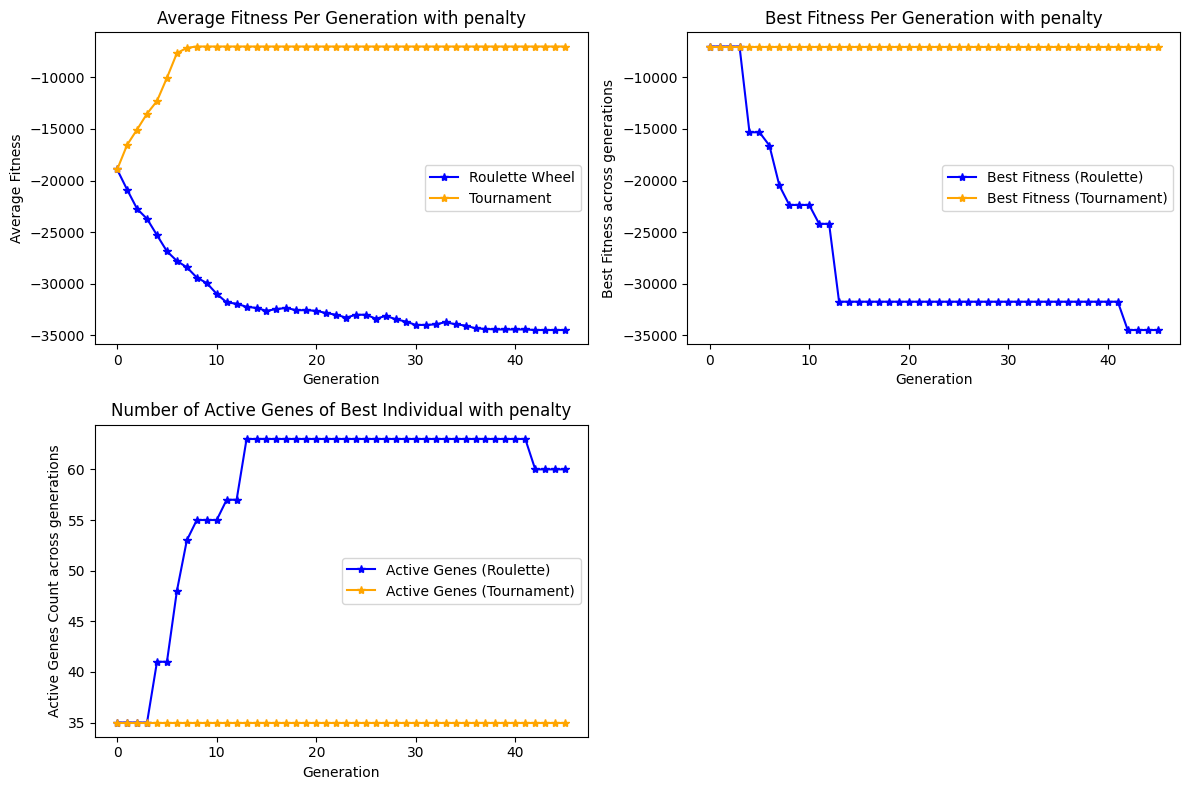

In [543]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
plt.plot(avg_fit_gen_rou_pen, label="Roulette Wheel", color='blue', marker = '*')
plt.plot(avg_fit_gen_tou_pen, label="Tournament", color='orange', marker = '*')
plt.title('Average Fitness Per Generation with penalty')
plt.xlabel('Generation')
plt.ylabel('Average Fitness')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(best_fit_gen_rou_pen, label=f'Best Fitness (Roulette)', color='blue', marker = '*')
plt.plot(best_fit_gen_tou_pen, label=f'Best Fitness (Tournament)', color='orange', marker = '*')
plt.title('Best Fitness Per Generation with penalty')
plt.xlabel('Generation')
plt.ylabel('Best Fitness across generations')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(best_gene_gen_rou_pen, label='Active Genes (Roulette)', color='blue', marker = '*')
plt.plot(best_gene_gen_tou_pen, label='Active Genes (Tournament)', color='orange', marker = '*')
plt.title('Number of Active Genes of Best Individual with penalty')
plt.xlabel('Generation')
plt.ylabel('Active Genes Count across generations')
plt.legend()

plt.tight_layout()
plt.show()

###### Values of Best individual across generations using roulette and tournament - with penalty

In [544]:
print("Using Tournament Selection method for config 2 with penalty:")
best_fit_pen = max(best_fit_gen_tou_pen)
best_gen_pen = best_fit_gen_tou_pen.index(best_fit_pen)
best_active_genes_pen = best_gene_gen_tou_pen[best_gen_pen]
print("The number of active genes in the best solution across all generations: ", best_active_genes_pen)
print(f"The fitness of the best solution across all generations: {best_fit_pen:.2f}")
print("The first generation which has produced best solution: ", best_gen_pen)

Using Tournament Selection method for config 2 with penalty:
The number of active genes in the best solution across all generations:  35
The fitness of the best solution across all generations: -7004.92
The first generation which has produced best solution:  0


##### Q3 Integrate Cross-over and Mutation (10 points): Run trials with each selection operator.
This time, include your implemented crossover and mutation operators and report the results.
Again, plot the average fitness across generations and provide the best solutions, as described in
problem Q2. Discuss your observations, and compare them to the results in Q2.
If you completed the extra credit assignment by implementing your own stop criterion function,
include the comparative results and description as outlined above at the end of your response to
Q3, clearly marked as Q3 extra credit

##### Knapsack Implementation with crossover and mutation with the given fitness function

In [545]:
import matplotlib.pyplot as plt
def knapsack_GA(P, W, S, g, stop, selection, mr):
    pop_size = len(P)
    avg_fit = []
    best_fit = []
    best_gene = []
    while g < stop:
        fitness_values = [fitness_function(chromosome, S, W) for chromosome in P]
        avg_fit.append(np.mean(fitness_values))
        best_chr = P[np.argmax(fitness_values)]
        best_fit.append(max(fitness_values))
        best_gene.append(np.sum(best_chr))
        new_P = []
        for _ in range(pop_size // 2):
            if selection == 'roulette':
                parent1 = roulette_wheel(P, fitness_values)
                parent2 = roulette_wheel(P, fitness_values)
            elif selection == 'tournament':
                parent1 = tournament(P, fitness_values)
                parent2 = tournament(P, fitness_values)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mr)
            child2 = mutate(child2, mr)
            new_P.append(child1)
            new_P.append(child2)
        P = np.array(new_P)
        g +=1
    fitness_values_final = [fitness_function(chromosome, S, W) for chromosome in P]
    avg_fit_final = np.mean(fitness_values)
    avg_fit.append(avg_fit_final)
    best_fit.append(max(fitness_values_final))
    best_chr_final = P[np.argmax(fitness_values)]
    best_gene.append(np.sum(best_chr_final))
    return best_chr_final, avg_fit, best_fit, best_gene

##### Knapsack Implementation using penalty function (custom fitness) and repair solution to avoid weights greater than knapsack capacity

In [546]:
def knapsack_GA_penalty(P, W, S, g, stop, selection, mr):
    pop_size = len(P)
    avg_fit = []
    best_fit = []
    best_gene = []
    while g < stop:
        fitness_values = [fitness_function_penalty(chromosome, S, W) for chromosome in P]
        avg_fit.append(np.mean(fitness_values))
        best_chr = P[np.argmax(fitness_values)]
        best_fit.append(max(fitness_values))
        best_gene.append(np.sum(best_chr))
        new_P = []
        for _ in range(pop_size // 2):
            if selection == 'roulette':
                parent1 = roulette_wheel(P, fitness_values)
                parent2 = roulette_wheel(P, fitness_values)
            elif selection == 'tournament':
                parent1 = tournament(P, fitness_values)
                parent2 = tournament(P, fitness_values)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mr)
            child2 = mutate(child2, mr)
            child1 = repair_function(child1, S, W)
            child2 = repair_function(child2, S, W)
            new_P.append(child1)
            new_P.append(child2)
        P = np.array(new_P)
        g +=1
    fitness_values_final = [fitness_function_penalty(chromosome, S, W) for chromosome in P]
    avg_fit_final = np.mean(fitness_values)
    avg_fit.append(avg_fit_final)
    best_fit.append(max(fitness_values_final))
    best_chr_final = P[np.argmax(fitness_values)]
    best_gene.append(np.sum(best_chr_final))
    return best_chr_final, avg_fit, best_fit, best_gene

##### Trying Different mutation rates for each scenario - considering the one that has more average fitness score across all generations

In [581]:
def multiple_mutation_rates(P, W, S, g, stop, selection_method):
    mutation_rates = np.arange(0.05, 0.21, 0.05)
    best_avg_fitness = -1
    best_mutation_rate = None
    for Mr in mutation_rates:
        best_chr_final, avg_fitness_gen, best_fitness_gen, best_genes_gen = knapsack_GA(P, W, S, g, stop, selection_method, Mr)
        final_avg_fitness = np.mean(avg_fitness_gen)
        if final_avg_fitness > best_avg_fitness:
            best_avg_fitness = final_avg_fitness
            best_mutation_rate = Mr
    #print(f"Best Mutation Rate: {best_mutation_rate:.2f}, Best Average Fitness: {best_avg_fitness:.2f}")
    return best_chr_final, avg_fitness_gen, best_fitness_gen, best_genes_gen, best_mutation_rate

In [582]:
def multiple_mutation_rates_penalty(P, W, S, g, stop, selection_method):
    mutation_rates = np.arange(0.05, 0.21, 0.05)
    best_avg_fitness = -1
    best_mutation_rate = None
    for Mr in mutation_rates:
        best_chr_final, avg_fitness_gen, best_fitness_gen, best_genes_gen = knapsack_GA_penalty(P, W, S, g, stop, selection_method, Mr)
        final_avg_fitness = np.mean(avg_fitness_gen)
        if final_avg_fitness > best_avg_fitness:
            best_avg_fitness = final_avg_fitness
            best_mutation_rate = Mr
    #print(f"Best Mutation Rate: {best_mutation_rate:.2f}, Best Average Fitness: {best_avg_fitness:.2f}")
    return best_chr_final, avg_fitness_gen, best_fitness_gen, best_genes_gen, best_mutation_rate

##### Methods for plotting graphs

In [553]:
def plot_graph_avg(avg_fitness_roulette, avg_fitness_tournament):
    plt.figure(figsize=(10, 5))
    plt.plot(avg_fitness_roulette, label=f'Roulette (Best Mr={best_mr_roulette:.2f})', color='blue', marker = '*')
    plt.plot(avg_fitness_tournament, label=f'Tournament (Best Mr={best_mr_tournament:.2f})', color='orange', marker = '*')
    plt.title('Average Fitness Per Generation with Best Mutation Rate')
    plt.xlabel('Generation')
    plt.ylabel('Average Fitness')
    plt.legend()

In [554]:
def plot_graphs(best_fitness_roulette, best_fitness_tournament, best_genes_roulette, best_genes_tournament):
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.plot(best_fitness_roulette, label=f'Best Fitness (Roulette)', color='blue', marker = '*')
    plt.plot(best_fitness_tournament, label=f'Best Fitness (Tournament)', color='orange', marker = '*')
    plt.title('Best Fitness Per Generation with Best Mutation Rate')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.legend()
    
    plt.subplot(2, 2, 2)
    plt.plot(best_genes_roulette, label='Active Genes (Roulette)', color='blue', marker = '*')
    plt.plot(best_genes_tournament, label='Active Genes (Tournament)', color='orange', marker = '*')
    plt.title('Number of Active Genes of Best Individual Per Generation')
    plt.xlabel('Generation')
    plt.ylabel('Active Genes Count')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

##### Printing Results - Details of the best at Pstop and the best individual across all the generations

In [555]:
def print_results(S, W, best_chr_final, best_fitness, best_mr, best_genes):
    print("At Pstop:")
    print("Best Individual : ", best_chr_final)
    print("No of items included : ", np.sum(best_chr_final)) 
    print("Total Value : ", fitness_function(best_chr_final, S, W))
    print("Total Weight : ", weight_function(best_chr_final, S))
    print(f"Best Mutation Rate : {best_mr:.2f}")
    
    print("Best Solution across all generations: ")
    best_fit = max(best_fitness)
    best_gen = best_fitness.index(best_fit)
    active_genes = best_genes[best_gen]
    print("The number of active genes in the best solution across all generations: ", active_genes)
    print(f"The fitness of the best solution across all generations: {best_fit:.2f}")
    print("The first generation which has produced best solution: ", best_gen)

In [556]:
config_file_1 = 'config_1.txt'
config_file_2 = 'config_2.txt'
P1, W1, S1, g1, stop1, n1 = get_initial_population_config(config_file_1)
P2, W2, S2, g2, stop2, n2 = get_initial_population_config(config_file_2)

##### Case 1: Without penalty and Repair

###### Config1

In [557]:
print("Selection using Roulette Wheel, trying the range of mutation rates and finding the best one:")
best_chr_final_roulette, avg_fitness_roulette, best_fitness_roulette, best_genes_roulette, best_mr_roulette = multiple_mutation_rates(P1, W1, S1, g1, stop1, 'roulette')
print_results(S1, W1, best_chr_final_roulette, best_fitness_roulette, best_mr_roulette, best_genes_roulette)

Selection using Roulette Wheel, trying the range of mutation rates and finding the best one:
Best Mutation Rate: 0.05, Best Average Fitness: 2654.28
At Pstop:
Best Individual :  [1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0
 1 0 0 0 1 1 0 0 0 0 1 0 1]
No of items included :  23
Total Value :  4084
Total Weight :  752
Best Mutation Rate : 0.05
Best Solution across all generations: 
The number of active genes in the best solution across all generations:  25
The fitness of the best solution across all generations: 5574.00
The first generation which has produced best solution:  13


In [558]:
print("Selection using tournament, trying the range of mutation rates and finding the best one:")
best_chr_final_tournament, avg_fitness_tournament, best_fitness_tournament, best_genes_tournament, best_mr_tournament = multiple_mutation_rates(P1, W1, S1, g1, stop1, 'tournament')
print_results(S1, W1, best_chr_final_tournament, best_fitness_tournament, best_mr_tournament, best_genes_tournament)

Selection using tournament, trying the range of mutation rates and finding the best one:
Best Mutation Rate: 0.05, Best Average Fitness: 2187.63
At Pstop:
Best Individual :  [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1
 1 0 0 0 1 0 0 0 0 1 0 1 0]
No of items included :  17
Total Value :  2556
Total Weight :  511
Best Mutation Rate : 0.05
Best Solution across all generations: 
The number of active genes in the best solution across all generations:  24
The fitness of the best solution across all generations: 5650.00
The first generation which has produced best solution:  15


Plotting average fitness, best fitness and the number of active genes in each generation using config1


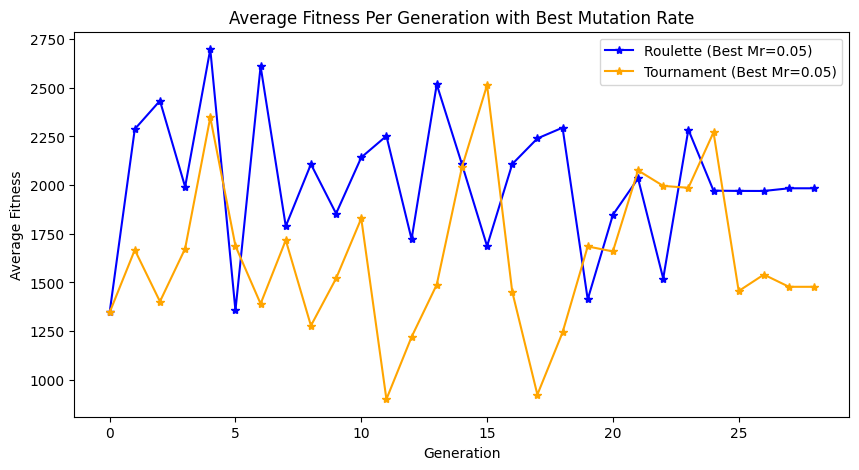

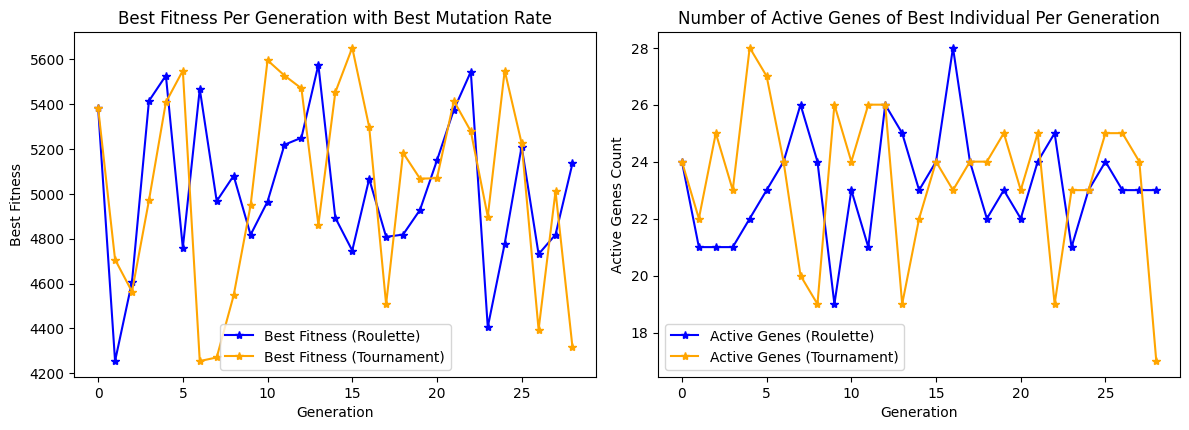

In [559]:
print("Plotting average fitness, best fitness and the number of active genes in each generation using config1")
plot_graph_avg(avg_fitness_roulette, avg_fitness_tournament)
plot_graphs(best_fitness_roulette, best_fitness_tournament, best_genes_roulette, best_genes_tournament)

###### Config2

In [560]:
print("Selection using Roulette Wheel, trying the range of mutation rates and finding the best one:")
best_chr_final_roulette, avg_fitness_roulette, best_fitness_roulette, best_genes_roulette, best_mr_roulette = multiple_mutation_rates(P2, W2, S2, g2, stop2, 'roulette')
print_results(S2, W2, best_chr_final_roulette, best_fitness_roulette, best_mr_roulette, best_genes_roulette)

Selection using Roulette Wheel, trying the range of mutation rates and finding the best one:
Best Mutation Rate: 0.05, Best Average Fitness: 0.00
At Pstop:
Best Individual :  [1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0
 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1
 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1]
No of items included :  60
Total Value :  0
Total Weight :  29353
Best Mutation Rate : 0.05
Best Solution across all generations: 
The number of active genes in the best solution across all generations:  51
The fitness of the best solution across all generations: 0.00
The first generation which has produced best solution:  0


In [561]:
print("Selection using tournament, trying the range of mutation rates and finding the best one:")
best_chr_final_tournament, avg_fitness_tournament, best_fitness_tournament, best_genes_tournament, best_mr_tournament = multiple_mutation_rates(P2, W2, S2, g2, stop2, 'tournament')
print_results(S2, W2, best_chr_final_tournament, best_fitness_tournament, best_mr_tournament, best_genes_tournament)

Selection using tournament, trying the range of mutation rates and finding the best one:
Best Mutation Rate: 0.05, Best Average Fitness: 0.00
At Pstop:
Best Individual :  [0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1
 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1]
No of items included :  58
Total Value :  0
Total Weight :  26596
Best Mutation Rate : 0.05
Best Solution across all generations: 
The number of active genes in the best solution across all generations:  51
The fitness of the best solution across all generations: 0.00
The first generation which has produced best solution:  0


Plotting average fitness, best fitness and the number of active genes in each generation using config2


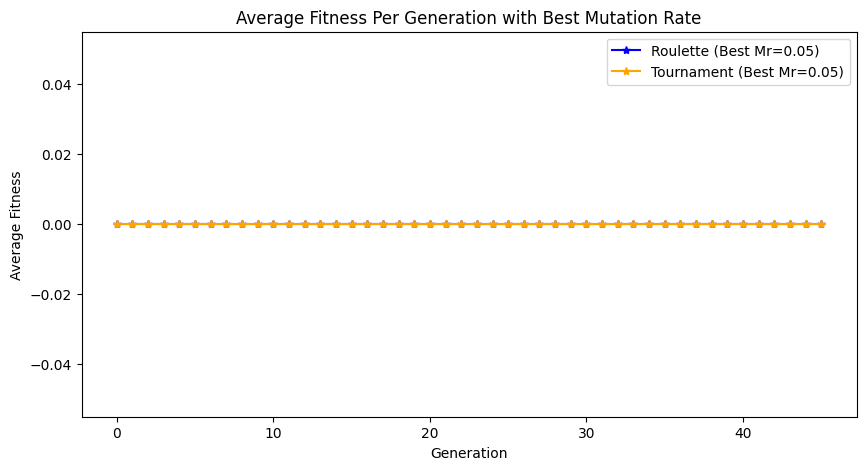

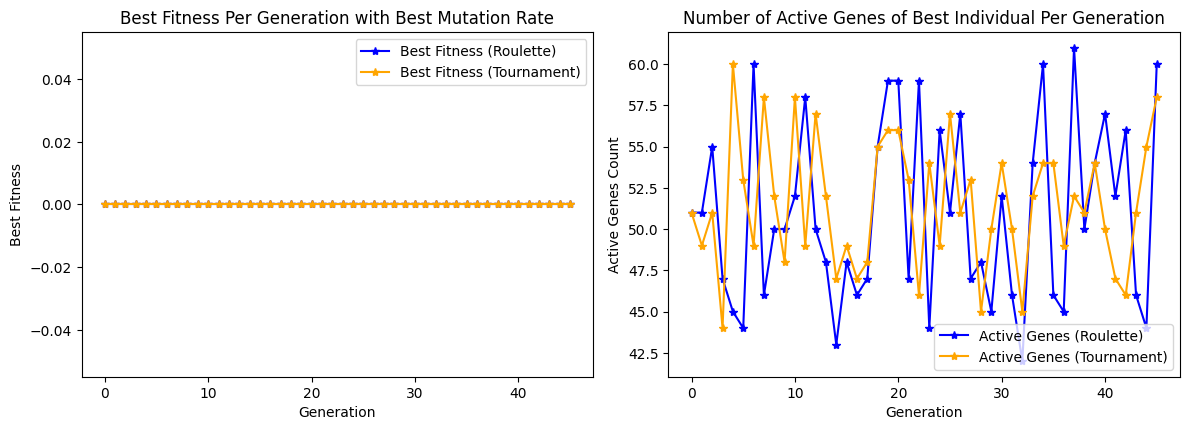

In [562]:
print("Plotting average fitness, best fitness and the number of active genes in each generation using config2")
plot_graph_avg(avg_fitness_roulette, avg_fitness_tournament)
plot_graphs(best_fitness_roulette, best_fitness_tournament, best_genes_roulette, best_genes_tournament)

##### Case 2: With penalty and repair, without convergence

###### Config1

In [563]:
print("Selection using Roulette Wheel, trying the range of mutation rates and finding the best one:")
best_chr_final_roulette, avg_fitness_roulette, best_fitness_roulette, best_genes_roulette, best_mr_roulette = multiple_mutation_rates_penalty(P1, W1, S1, g1, stop1, 'roulette')
print_results(S1, W1, best_chr_final_roulette, best_fitness_roulette, best_mr_roulette, best_genes_roulette)

Selection using Roulette Wheel, trying the range of mutation rates and finding the best one:
Best Mutation Rate: 0.20, Best Average Fitness: 4074.99
At Pstop:
Best Individual :  [1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0
 0 0 1 0 1 0 1 0 0 1 1 0 1]
No of items included :  26
Total Value :  5630
Total Weight :  807
Best Mutation Rate : 0.20
Best Solution across all generations: 
The number of active genes in the best solution across all generations:  27
The fitness of the best solution across all generations: 6734.00
The first generation which has produced best solution:  2


In [564]:
print("Selection using tournament, trying the range of mutation rates and finding the best one:")
best_chr_final_tournament, avg_fitness_tournament, best_fitness_tournament, best_genes_tournament, best_mr_tournament = multiple_mutation_rates_penalty(P1, W1, S1, g1, stop1, 'tournament')
print_results(S1, W1, best_chr_final_tournament, best_fitness_tournament, best_mr_tournament, best_genes_tournament)

Selection using tournament, trying the range of mutation rates and finding the best one:
Best Mutation Rate: 0.05, Best Average Fitness: 4208.10
At Pstop:
Best Individual :  [0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0
 0 1 1 0 1 1 0 0 1 0 0 0 1]
No of items included :  23
Total Value :  4593
Total Weight :  804
Best Mutation Rate : 0.05
Best Solution across all generations: 
The number of active genes in the best solution across all generations:  28
The fitness of the best solution across all generations: 6219.00
The first generation which has produced best solution:  8


Plotting average fitness, best fitness and the number of active genes in each generation using config1


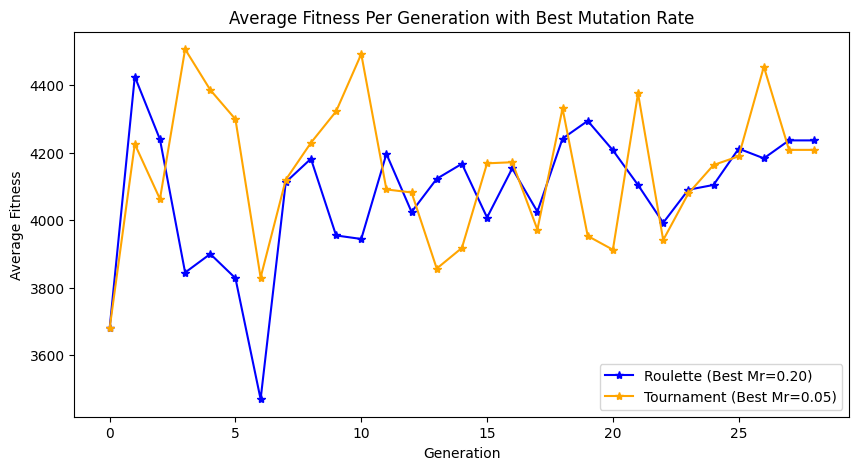

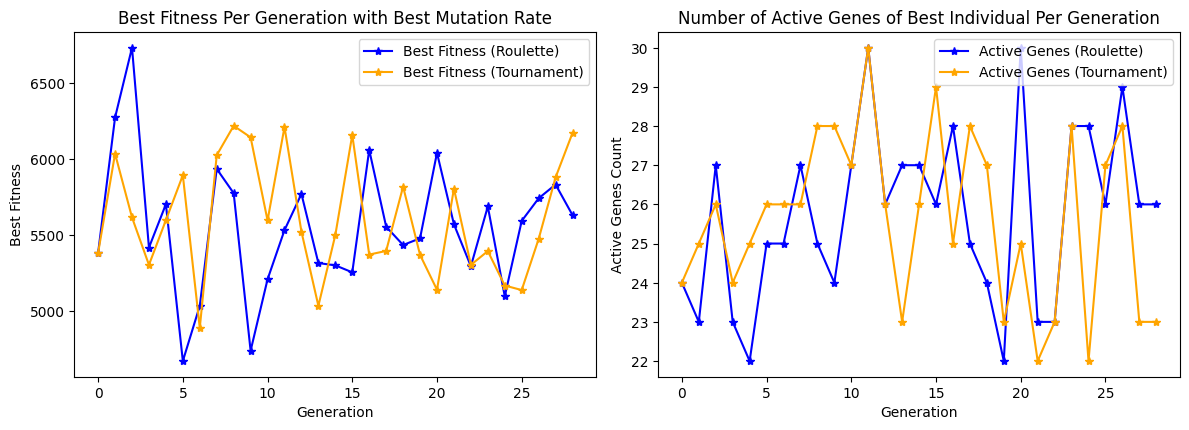

In [565]:
print("Plotting average fitness, best fitness and the number of active genes in each generation using config1")
plot_graph_avg(avg_fitness_roulette, avg_fitness_tournament)
plot_graphs(best_fitness_roulette, best_fitness_tournament, best_genes_roulette, best_genes_tournament)

###### Config2

In [566]:
print("Selection using Roulette Wheel, trying the range of mutation rates and finding the best one:")
best_chr_final_roulette, avg_fitness_roulette, best_fitness_roulette, best_genes_roulette, best_mr_roulette = multiple_mutation_rates_penalty(P2, W2, S2, g2, stop2, 'roulette')
print_results(S2, W2, best_chr_final_roulette, best_fitness_roulette, best_mr_roulette, best_genes_roulette)

Selection using Roulette Wheel, trying the range of mutation rates and finding the best one:
Best Mutation Rate: 0.20, Best Average Fitness: 156.33
At Pstop:
Best Individual :  [1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0]
No of items included :  14
Total Value :  741
Total Weight :  2259
Best Mutation Rate : 0.20
Best Solution across all generations: 
The number of active genes in the best solution across all generations:  16
The fitness of the best solution across all generations: 1015.00
The first generation which has produced best solution:  5


In [567]:
print("Selection using tournament, trying the range of mutation rates and finding the best one:")
best_chr_final_tournament, avg_fitness_tournament, best_fitness_tournament, best_genes_tournament, best_mr_tournament = multiple_mutation_rates_penalty(P2, W2, S2, g2, stop2, 'tournament')
print_results(S2, W2, best_chr_final_tournament, best_fitness_tournament, best_mr_tournament, best_genes_tournament)

Selection using tournament, trying the range of mutation rates and finding the best one:
Best Mutation Rate: 0.20, Best Average Fitness: 170.80
At Pstop:
Best Individual :  [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0]
No of items included :  15
Total Value :  561
Total Weight :  2287
Best Mutation Rate : 0.20
Best Solution across all generations: 
The number of active genes in the best solution across all generations:  19
The fitness of the best solution across all generations: 985.00
The first generation which has produced best solution:  23


Plotting average fitness, best fitness and the number of active genes in each generation using config2


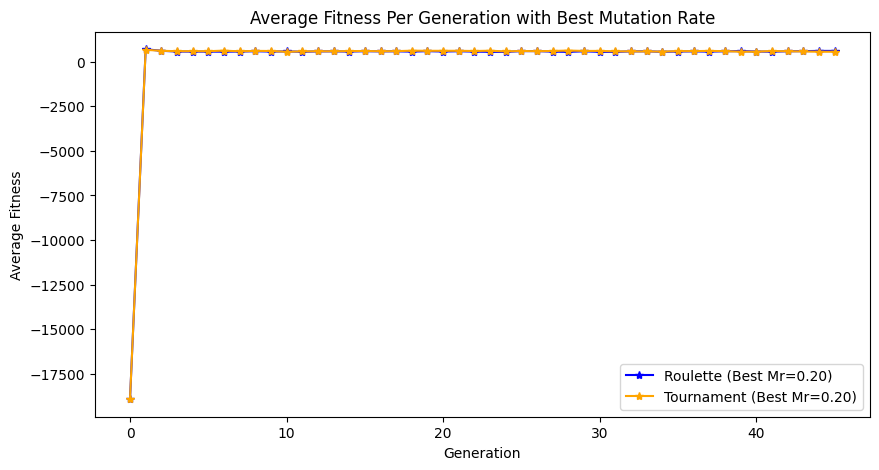

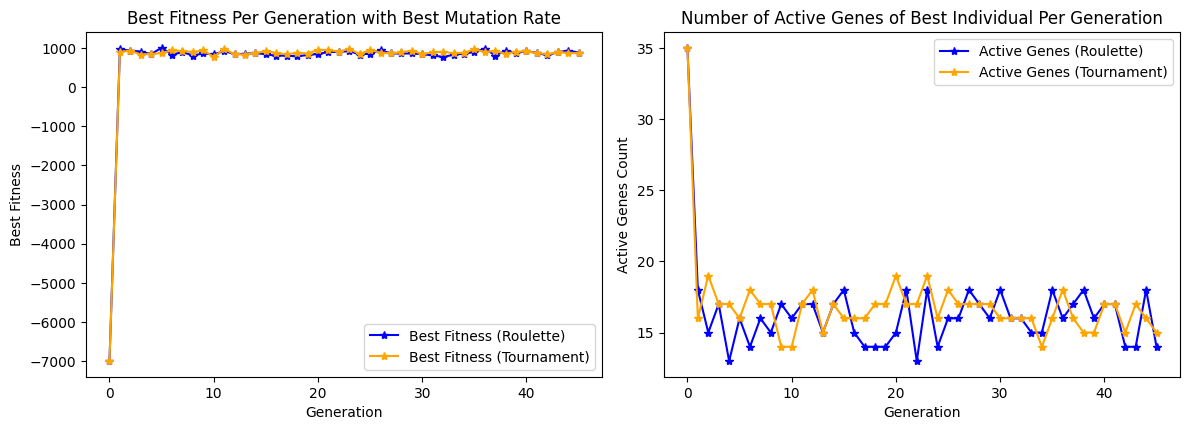

In [568]:
print("Plotting average fitness, best fitness and the number of active genes in each generation using config2")
plot_graph_avg(avg_fitness_roulette, avg_fitness_tournament)
plot_graphs(best_fitness_roulette, best_fitness_tournament, best_genes_roulette, best_genes_tournament)

##### Q3. Extra Credit

In [569]:
def knapsack_GA_convergence(P, W, S, g, patience, tolerance, selection, mr):
    pop_size = len(P)
    avg_fit = []
    best_fit = []
    best_gene = []
    best_fit_so_far = 0.0
    no_imp_gen = 0
    while no_imp_gen < patience:
        fitness_values = [fitness_function_penalty(chromosome, S, W) for chromosome in P]
        avg_fit.append(np.mean(fitness_values))
        best_chr = P[np.argmax(fitness_values)]
        best_fitness = max(fitness_values)
        best_fit.append(best_fitness)
        n_active_gen = np.sum(best_chr)
        best_gene.append(n_active_gen)
        if best_fitness > best_fit_so_far + tolerance:
            best_fit_so_far = best_fitness
            no_imp_gen = 0  
        else:
            no_imp_gen += 1  
        new_P = []
        for _ in range(pop_size // 2):
            if selection == 'roulette':
                parent1 = roulette_wheel(P, fitness_values)
                parent2 = roulette_wheel(P, fitness_values)
            elif selection == 'tournament':
                parent1 = tournament(P, fitness_values)
                parent2 = tournament(P, fitness_values)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mr)
            child2 = mutate(child2, mr)
            child1 = repair_function(child1, S, W)
            child2 = repair_function(child2, S, W)
            new_P.append(child1)
            new_P.append(child2)
        P = np.array(new_P)
        g += 1
    fitness_values_final = [fitness_function_penalty(chromosome, S, W) for chromosome in P]
    avg_fit_final = np.mean(fitness_values)
    avg_fit.append(avg_fit_final)
    best_fit.append(max(fitness_values_final))
    best_chr_final = P[np.argmax(fitness_values)]
    best_gene.append(np.sum(best_chr_final))
    return best_chr_final, avg_fit, best_fit, best_gene

In [570]:
def multiple_mutation_rates_convergence(P, W, S, g, patience, tolerance, selection_method):
    mutation_rates = np.arange(0.05, 0.21, 0.05)
    best_avg_fitness = -1
    best_mutation_rate = None
    for Mr in mutation_rates:
        best_chr_final, avg_fitness_gen, best_fitness_gen, best_genes_gen = knapsack_GA_convergence(P, W, S, g, patience, tolerance, selection_method, Mr)
        final_avg_fitness = np.mean(avg_fitness_gen)
        if final_avg_fitness > best_avg_fitness:
            best_avg_fitness = final_avg_fitness
            best_mutation_rate = Mr
    print(f"Best Mutation Rate: {best_mutation_rate:.2f}, Best Average Fitness: {best_avg_fitness:.2f}")
    return best_chr_final, avg_fitness_gen, best_fitness_gen, best_genes_gen, best_mutation_rate

###### Config1

In [571]:
print("Selection using Roulette Wheel, trying the range of mutation rates and finding the best one:")
best_chr_final_roulette, avg_fitness_roulette, best_fitness_roulette, best_genes_roulette, best_mr_roulette = multiple_mutation_rates_convergence(P1, W1, S1, g1, 25, 0.01, 'roulette')
print_results(S1, W1, best_chr_final_roulette, best_fitness_roulette, best_mr_roulette, best_genes_roulette)

Selection using Roulette Wheel, trying the range of mutation rates and finding the best one:
Best Mutation Rate: 0.20, Best Average Fitness: 4063.63
At Pstop:
Best Individual :  [0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 1]
No of items included :  23
Total Value :  3639
Total Weight :  728
Best Mutation Rate : 0.20
Best Solution across all generations: 
The number of active genes in the best solution across all generations:  26
The fitness of the best solution across all generations: 5921.00
The first generation which has produced best solution:  16


In [572]:
print("Selection using tournament method, trying the range of mutation rates and finding the best one:")
best_chr_final_tournament, avg_fitness_tournament, best_fitness_tournament, best_genes_tournament, best_mr_tournament = multiple_mutation_rates_convergence(P1, W1, S1, g1, 25, 0.01, 'tournament')
print_results(S1, W1, best_chr_final_roulette, best_fitness_roulette, best_mr_roulette, best_genes_roulette)

Selection using tournament method, trying the range of mutation rates and finding the best one:
Best Mutation Rate: 0.05, Best Average Fitness: 4228.74
At Pstop:
Best Individual :  [0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 1]
No of items included :  23
Total Value :  3639
Total Weight :  728
Best Mutation Rate : 0.20
Best Solution across all generations: 
The number of active genes in the best solution across all generations:  26
The fitness of the best solution across all generations: 5921.00
The first generation which has produced best solution:  16


Plotting average fitness, best fitness and the number of active genes in each generation using config1


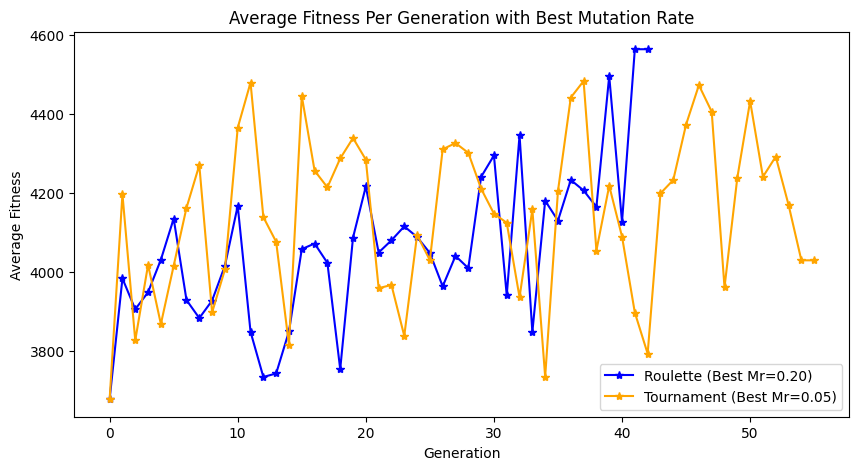

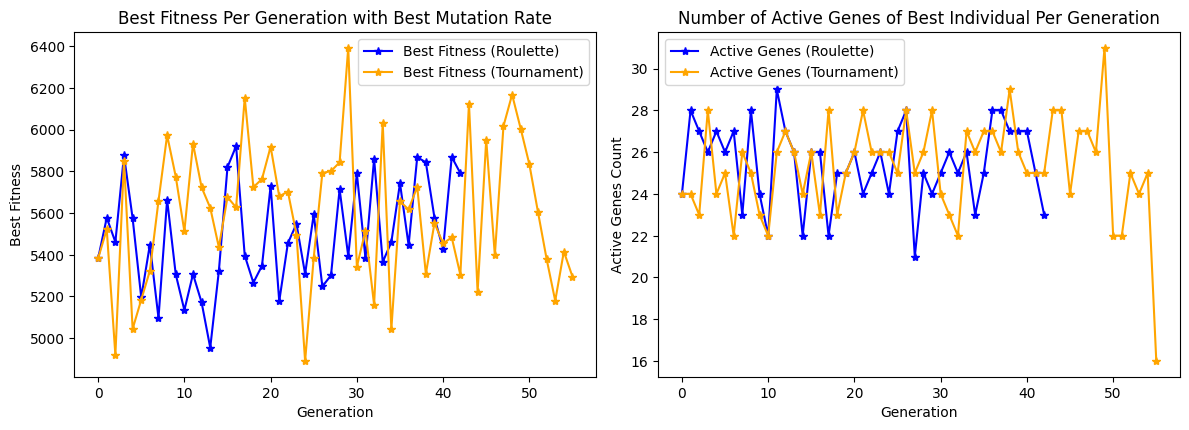

In [573]:
print("Plotting average fitness, best fitness and the number of active genes in each generation using config1")
plot_graph_avg(avg_fitness_roulette, avg_fitness_tournament)
plot_graphs(best_fitness_roulette, best_fitness_tournament, best_genes_roulette, best_genes_tournament)

##### Q4 Explore Population Sizes (10 points): 
Explore your GA implementation with different popu-
lation sizes. When reporting the result, note the following:
(a) Population size Explore at least 10 population sizes and report on them in terms of knapsack
total value, and knapsack max weight and number of included items, at the point of stopping
the search. (You may opt to use your own stopping criterion if you implemented the extra
credit for Q3.)
(b) Number of trials
Make sure you run each experiment with a specific population size for 30 trials (30 times) and
report mean weight and standard deviation as shown in the example Table 1 above. You may
use and adapt the starter code below.

In [577]:
def get_initial_population(pop_size, n):
    P = np.random.randint(2, size=(pop_size, n))
    return P

Run Number of trails

In [596]:
def run_trails(num_trails, P, W, S, g, stop, selection):
    final_values = []
    final_weights = []
    final_no_of_items = []
    for i in range(num_trails):
        #print(f"Trail: {i+1}")
        best_chr_final, best_avg_fitness_per_gen, best_fitness_per_gen, best_genes_per_gen, best_mutation_rate = multiple_mutation_rates(P, W, S, g, stop, selection)
        best_chromosome = best_chr_final
        best_value = fitness_function(best_chr_final, S, W)
        best_weight = weight_function(best_chr_final, S)
        no_items = np.sum(best_chr_final)
        final_values.append(best_value)
        final_weights.append(best_weight)
        final_no_of_items.append(no_items)
    mean_value = np.mean(final_values)
    std_value = np.std(final_values)
    max_weight = np.max(final_weights)
    mean_items = np.mean(final_no_of_items)
    print(f"Mean and Standard deviation of the final Values obtained in each trail: {mean_value:.2f} ± {std_value:.2f}")
    print(f"Maximum Weight included in the knapsack: {max_weight}")
    print(f"Mean number of items included in the knapsack: {int(np.round(mean_items))}")
    return best_chr_final

##### Considering different population sizes and running specified number of trails for each population size

In [597]:
def population_exploration(config, population_sizes, selection):
    results = []
    for pop_size in population_sizes:
        P, W, S, g, stop, n = get_initial_population_config(config)
        P = get_initial_population(pop_size, n)
        print("running the knapsack genetic algorithm with the population size: ", pop_size)
        best_chr_final = run_trails(30, P, W, S, g, stop, selection)
        fitness_value = value_function(best_chr_final, S, W)
        no_items = np.sum(best_chr_final)
        tvalue = fitness_value
        tweight = weight_function(best_chr_final, S)
        print("At the final trail:")
        print("Knapsack total capacity: ", W)
        print(f"Knapsack total value: {tvalue: .2f} ")
        print("Knapsack maximum weight included: ", tweight)
        print("Number of items included: ", no_items)
        results.append((pop_size, tvalue, tweight, no_items))
    return results

In [598]:
population_sizes = [20, 30, 40, 50, 60, 80, 90, 100, 110, 120]
print("Using Roulette wheel selection method, Knapsack total value, maximum weight in knapsack and number of included items for different population sizes:")
results = population_exploration('config_1.txt', population_sizes, 'roulette')

Using Roulette wheel selection method, Knapsack total value, maximum weight in knapsack and number of included items for different population sizes:
running the knapsack genetic algorithm with the population size:  20
Mean and Standard deviation of the final Values obtained in each trail: 2258.83 ± 1798.54
Maximum Weight included in the knapsack: 1090
Mean number of items included in the knapsack: 22
At Pstop:
Knapsack total capacity:  850
Knapsack total value:  3120.00 
Knapsack maximum weight included:  978
Number of items included:  21
running the knapsack genetic algorithm with the population size:  30
Mean and Standard deviation of the final Values obtained in each trail: 2149.30 ± 1867.87
Maximum Weight included in the knapsack: 1078
Mean number of items included in the knapsack: 22
At Pstop:
Knapsack total capacity:  850
Knapsack total value:  5406.00 
Knapsack maximum weight included:  854
Number of items included:  25
running the knapsack genetic algorithm with the population 

In [599]:
print("Using Roulette wheel selection method, Knapsack total value, maximum weight in knapsack and number of included items for different population sizes using config 2:")
results = population_exploration('config_2.txt', population_sizes, 'roulette')

Using Roulette wheel selection method, Knapsack total value, maximum weight in knapsack and number of included items for different population sizes using config 2:
running the knapsack genetic algorithm with the population size:  20
Mean and Standard deviation of the final Values obtained in each trail: 0.00 ± 0.00
Maximum Weight included in the knapsack: 30357
Mean number of items included in the knapsack: 48
At Pstop:
Knapsack total capacity:  2341
Knapsack total value:  2237.00 
Knapsack maximum weight included:  22135
Number of items included:  49
running the knapsack genetic algorithm with the population size:  30
Mean and Standard deviation of the final Values obtained in each trail: 0.00 ± 0.00
Maximum Weight included in the knapsack: 29445
Mean number of items included in the knapsack: 51
At Pstop:
Knapsack total capacity:  2341
Knapsack total value:  2857.00 
Knapsack maximum weight included:  26601
Number of items included:  57
running the knapsack genetic algorithm with the 

#### Problem 2: Compare GA with a Non-population-based Search Algorithm
Use your favorite toolkit such as sk-learn, MatLab, R Studio, or your own code to implement another
search algorithm for the 0-1 knapsack problem. Describe what you did and your results. Compare with
the GA you implemented yourself.

In [290]:
def knapsack_dp(W, S, n):
    dp = np.zeros((n+1, W+1))
    for i in range(1, n+1):
        for w in range(W+1):
            if S[i-1][0] <= w:
                dp[i][w] = max(dp[i-1][w], dp[i-1][w - S[i-1][0]]+S[i-1][1])
            else:
                dp[i][w] = dp[i-1][w]
    max_value = dp[n][W]
    w = W
    included_item_weights = []
    for i in range(n, 0, -1):
        if dp[i][w]!=dp[i-1][w]:
            included_item_weights.append(S[i-1][0])
            w -= S[i-1][0]
    return max_value, included_item_weights

In [293]:
print("Applying Dynamic Programming for the config1: ")
max_value, included_item_weights = knapsack_dp(W1, S1, n1)
print("Total capacity of the knapsack: ", W1)
print(f"Total value of the items included in the knapsack: {max_value: .2f}")
print("Number of items included in the knapsack: ", len(included_item_weights))
print("Total weight of the items included in the knapsack: ", sum(included_item_weights))

Applying Dynamic Programming for the config1: 
Total capacity of the knapsack:  850
Total value of the items included in the knapsack:  7534.00
Number of items included in the knapsack:  32
Total weight of the items included in the knapsack:  850


In [294]:
print("Applying Dynamic Programming for the config2: ")
max_value, included_item_weights = knapsack_dp(W2, S2, n2)
print("Total capacity of the knapsack: ", W2)
print(f"Total value of the items included in the knapsack: {max_value: .2f}")
print("Number of items included in the knapsack: ", len(included_item_weights))
print("Total weight of the items included in the knapsack: ", sum(included_item_weights))

Applying Dynamic Programming for the config2: 
Total capacity of the knapsack:  2341
Total value of the items included in the knapsack:  1266.00
Number of items included in the knapsack:  20
Total weight of the items included in the knapsack:  2335
